# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# To view a sample of the data
data.sample(
    10, random_state=1
)  # setting the random_state ensures we get the same results every time

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

#### Observations

- There are few devices where brand name and OS are unknown, mentioned as Others.
- Main camera (main_camera_mp) has a wide range from 3.15 to 20.70 megapixels. There are few missing values in the column. 
- Internal memory (int_memory) also has a wide range from 16 till 512 GB
- Most of the devices are not 5g

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations
There are no duplicate values in the dataset.

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

#### Observations
- Most of the columns are of type integer (float64 or int64).
- There are 4 columns of type object

In [8]:
# checking for missing values in the data.
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
There are few missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight columns.

In [9]:
# Checking the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

#### Observations
- Android is the most common os among used devices
- Most of the devices are not 5g enabled. 
- normalized_used_price appears to have a normal distribution. Mean and 50% (median) are very close. However, minimum and maximum values are quite far from the median. 
- days_used has a wide range from 3 months to almost 3 years. 
- Most of the numeric variables have a wide range.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate analysis


In [10]:
# Function to plot distribution plot and box plot as subplots in one row.
# This will be a resuable for univariate analysis of different variables of df dataframe


def distribution_box_plot(
    data, series, kde=False, mean=False, median=False, mode=False
):
    """
    Distplot and boxplot as subplots for a series within a dataframe
    data =  Dataframe
    series = column / variable under analysis
    kde =  Boolean. To show Kernel Density Estimate curve. Default set to False
    mean =  Boolean. To show mean value of a numeric series. Default set to False
    median = Boolean. To show median of a numeric series. Default set to False
    mode = Boolean. To show first mode value of a numeric series. Default set to False
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(
        1, 2, 1
    )  # Divides the plot area into subplots with 1 row and 2 columns. 3rd arg indicates plot index
    sns.histplot(data[series], kde=kde)  # Add distribution plot
    if mean == True:  # Add mean indicator to the distplot
        plt.axvline(data[series].mean(), color="r", linestyle="--", label="Mean")
    if median == True:  # Add median indicator to the distplot
        plt.axvline(data[series].median(), color="g", linestyle="-", label="Median")
    if mode == True:  # Add first modal value indicator to the distplot
        plt.axvline(data[series].mode()[0], color="b", linestyle="-", label="Mode")

    plt.legend()  # Show legends

    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=data, y=series, showmeans=True
    )  # Add box plot with mean value indicator
    plt.show()

<IPython.core.display.Javascript object>

In [11]:
# Function to plot labelled countplot with percentage and count over the bars  
# This will be a resuable for univariate analysis of different variables / columns within df dataframe

def labelled_countplot(data, series, showper=True, showcount=True, n=None):
    """
    data = Dataframe
    series = column / variable under analysis
    showper = Boolean. To show percentage over the bars.Default set to True
    showcount = Boolean. To show count over the bars.Default set to True
    n = number of top records to plot
    """
    count = data[series].nunique()  # get the number of unique values of the column
    if n is None:
        plt.figure(figsize=(count + 3.5, 7)) # Adjust the width of the graph area as per the unique values
    else:
        plt.figure(figsize=(n + 5, 5)) # Adjust the width of the graph area as per the n value specified
   
    # Show countplot of the data in descending order of value count 
    ax = sns.countplot(x=data[series],order=data[series].value_counts(ascending=False).index[:n])  
    
    # If True, show count as data label over each bar
    if showcount == True:
        for p, label in zip(ax.patches, data[series].value_counts(ascending=False).values):
            ax.annotate(label, (p.get_x()+0.100, p.get_height()+3.5))
    
    # If True, show percentage as data label over each bar
    if showper == True:
        total = data[series].count()
        for p, label in zip(ax.patches, 100 * data[series].value_counts(ascending=False).values / total):
            ax.annotate("({:.2f}%)".format(label), (p.get_x()+0.350, p.get_height()+3.5))
    
    plt.show()


<IPython.core.display.Javascript object>

**`normalized_used_price`**

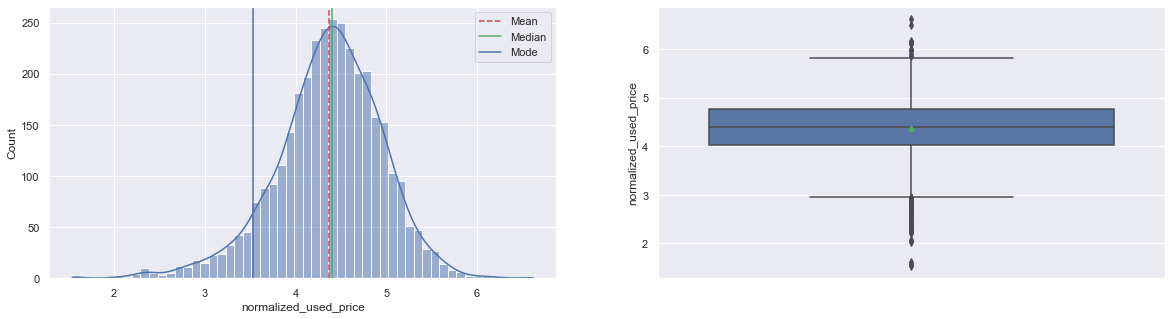

<IPython.core.display.Javascript object>

In [12]:
# Calling the distribution_box_plot function defined above for normalized_used_price variable
distribution_box_plot(
    df, "normalized_used_price", kde=True, mean=True, median=True, mode=True
)

#### Observations
- The data appears to have a normal distribution. Mean is almost same as median, however mode (the most frequently occurring data) is far left from the mean/median. 
- There are quite a few outliers in the data. 

**`normalized_new_price`**

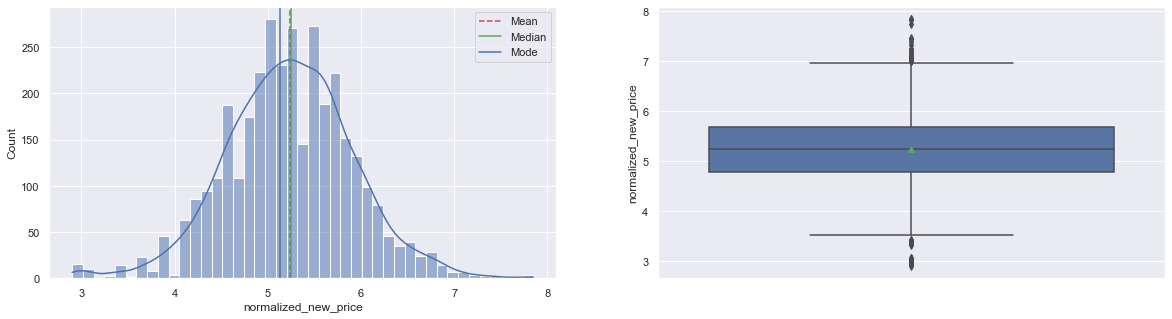

<IPython.core.display.Javascript object>

In [13]:
distribution_box_plot(
    df, "normalized_new_price", kde=True, mean=True, median=True, mode=True
)

#### Observations
- The data appears to have a normal distribution. Mean is almost same as median, however mode (the most frequently occurring data) is far left from the mean/median. 
- There are quite a few outliers in the data. 

**`screen_size`**

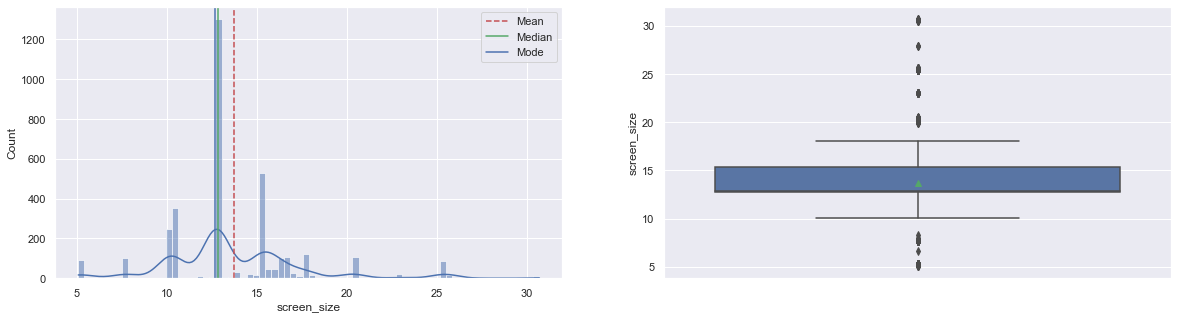

<IPython.core.display.Javascript object>

In [14]:
distribution_box_plot(df, "screen_size", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows positive (right) skewness. The mean is to the right of the median. 
- There are quite a few outliers in the data. 
- Most of the devices have screen size between 11 and 15 cm.

**`main_camera_mp`**

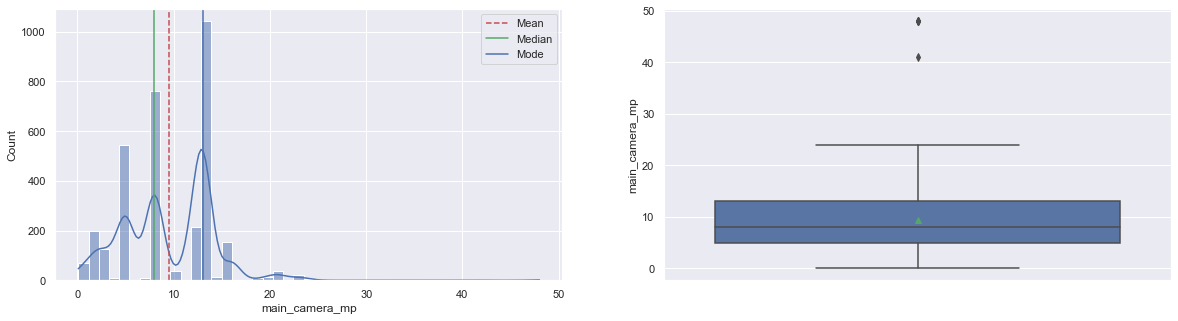

<IPython.core.display.Javascript object>

In [15]:
distribution_box_plot(df, "main_camera_mp", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows positive (right) skewness. The mean is to the right of the median. 
- Most of the devices have main camera somewhere between 12 and 16 megapixels.
- There are few outliers in the data above the third quartile.
- Minimum value starts from 0 which indicates that there are devices with no main camera at all. 

**`selfie_camera_mp`**

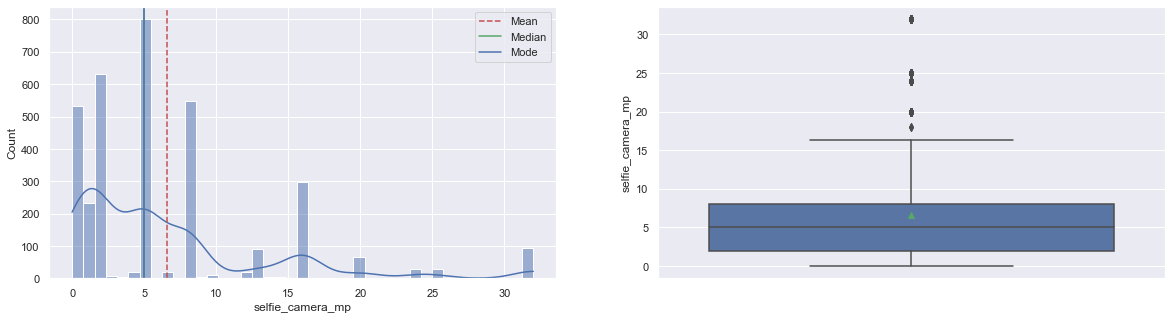

<IPython.core.display.Javascript object>

In [16]:
distribution_box_plot(
    df, "selfie_camera_mp", kde=True, mean=True, median=True, mode=True
)

#### Observations
- The data shows positive (right) skewness. The mean is to the right of the median. 
- Median and Mode are overlapping. 
- There are quite a few outliers in the data above the third quartile.
- Minimum value starts from 0 which indicates that there are devices with no selfie camera at all. 

**`int_memory`**

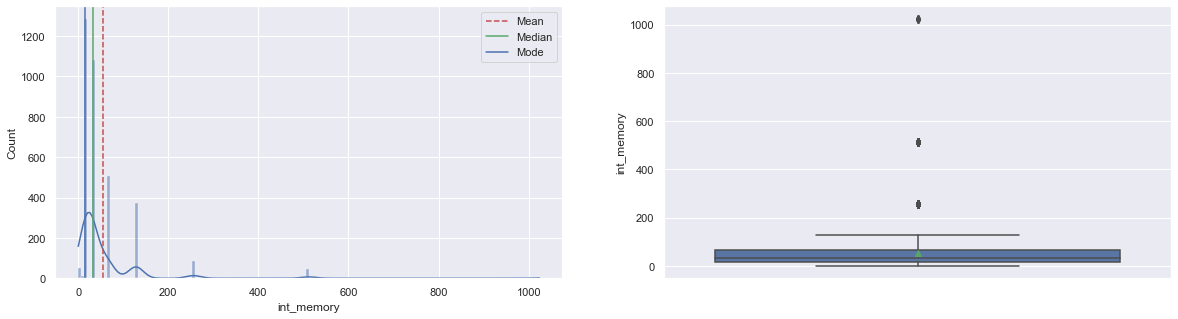

<IPython.core.display.Javascript object>

In [17]:
distribution_box_plot(df, "int_memory", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows positive (right) skewness. The mean is to the right of the median. 
- Most of the devices have internal memory upto 200 GB
- There are a few outliers in the data above the third quartile.

**`ram`**

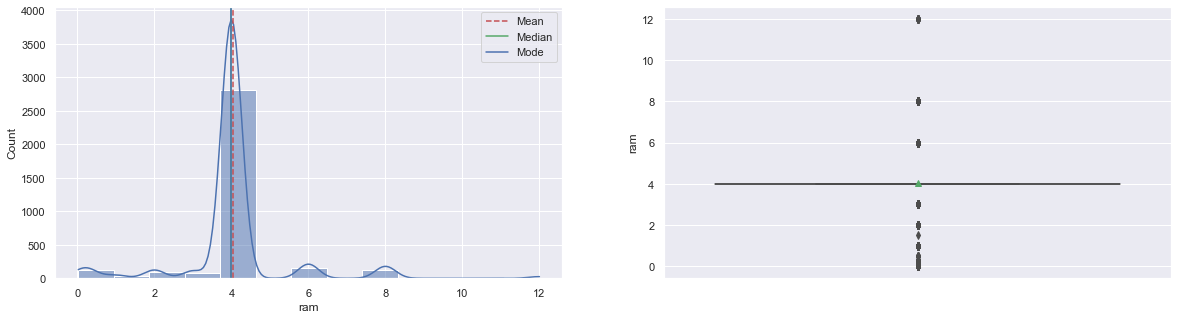

<IPython.core.display.Javascript object>

In [18]:
distribution_box_plot(df, "ram", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data appears to have a fairly normal distribution, with the median overlapping with the mean. 
- Most of the data is clusttered around the median/mean, i.e. majority devices have 4 GB ram. 
- There are quite a few outliers both below IQR1 and above IQR3.

**`weight`**

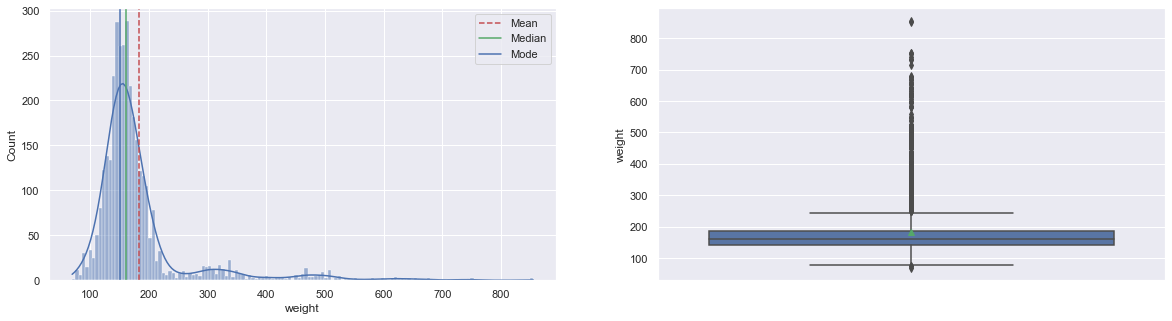

<IPython.core.display.Javascript object>

In [19]:
distribution_box_plot(df, "weight", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows positive skewness. 
- Most of the devices weigh between 100 and 200 gms. 
- There are lots of outliers above IQR3, and a few below IQR1.

In [20]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["weight_log"] = np.log(df["weight"])

<IPython.core.display.Javascript object>

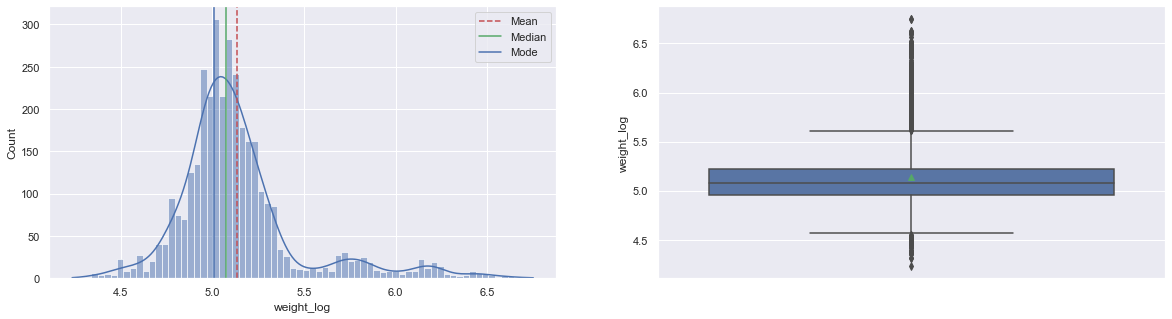

<IPython.core.display.Javascript object>

In [21]:
distribution_box_plot(df, "weight_log", kde=True, mean=True, median=True, mode=True)

The distribution is slightly close to the normal than earlier, but there is still some positive skewness. 

**`battery`**

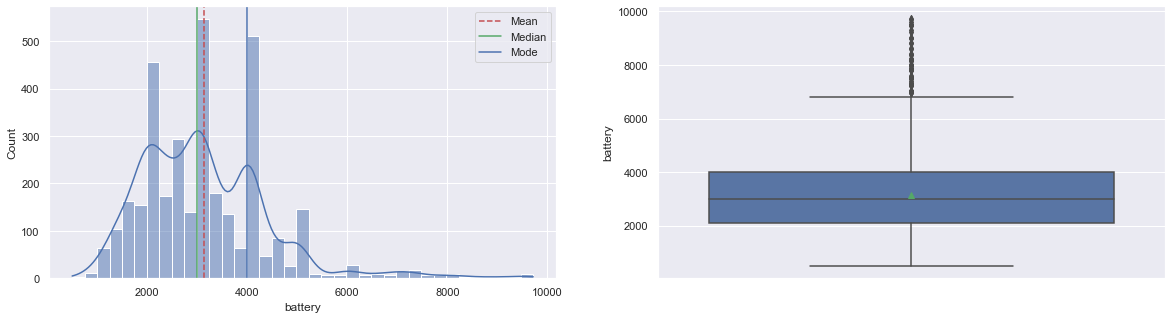

<IPython.core.display.Javascript object>

In [22]:
distribution_box_plot(df, "battery", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows positive skewness. 
- Most of the devices have batteries between 2000 and 4000 mAH, with the data clusterred around boundary values, i.e. 2000 and 4000 mAH. 
- There are lots of outliers above IQR3.

**`days_used`**

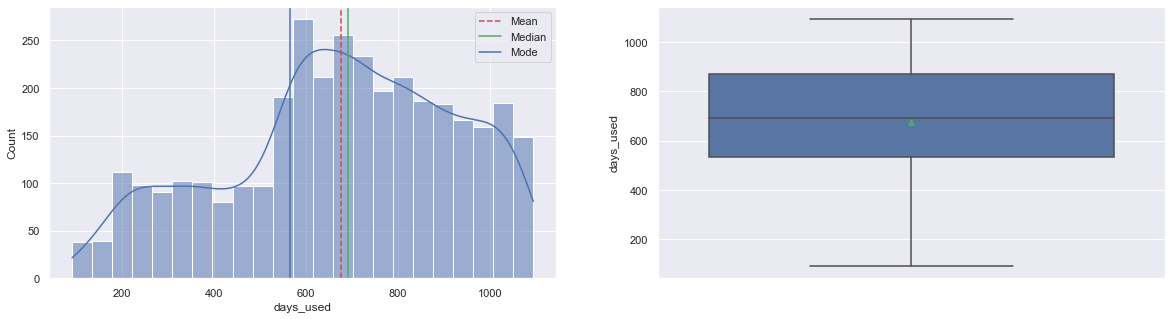

<IPython.core.display.Javascript object>

In [23]:
distribution_box_plot(df, "days_used", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data shows negative skewness, i.e. left skewed. 
- Most of the devices have been used between 500 to 900 days. 
- There are no outliers in the data. 

**`os`**

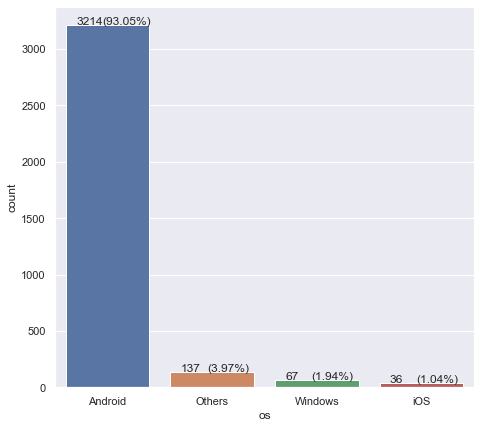

<IPython.core.display.Javascript object>

In [24]:
labelled_countplot(df, "os", showper=True, showcount=True)

#### Observations
- 93% of used device market is dominated by Android. 
- Among others, most of the devices have os unknown, marked as Others.


**`4g`**

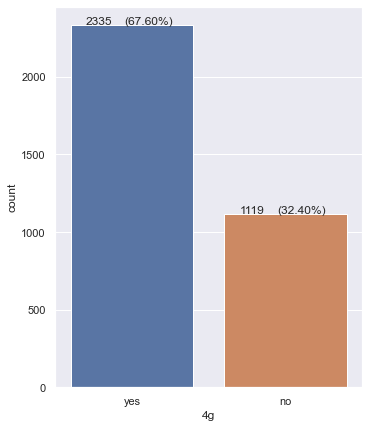

<IPython.core.display.Javascript object>

In [25]:
labelled_countplot(df, "4g", showper=True, showcount=True)

#### Observations
- Nearly 68% used devices are 4g enabled.


**`5g`**

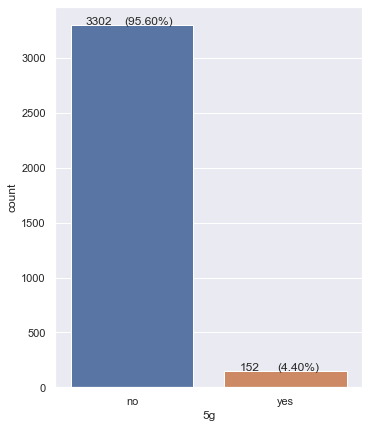

<IPython.core.display.Javascript object>

In [26]:
labelled_countplot(df, "5g", showper=True, showcount=True)

#### Observations
- Almost all used devices (96%) do not support 5g


**`release_year`**

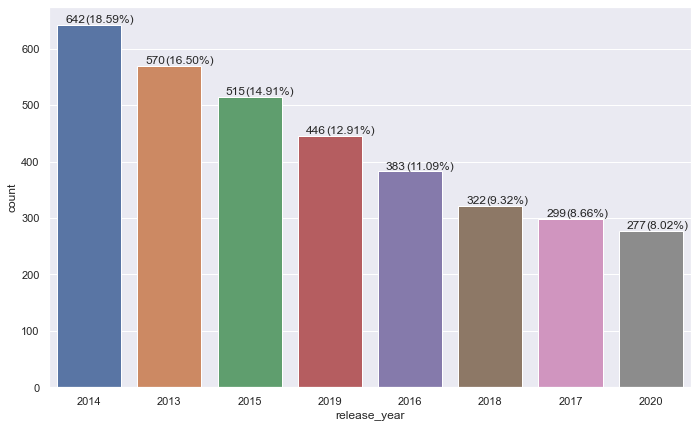

<IPython.core.display.Javascript object>

In [27]:
labelled_countplot(df, "release_year", showper=True, showcount=True)

#### Observations
- 2014 models constitute largest share in the used device market, followed by 2013, 2015 and 2019 models. 


**`brand_name`**

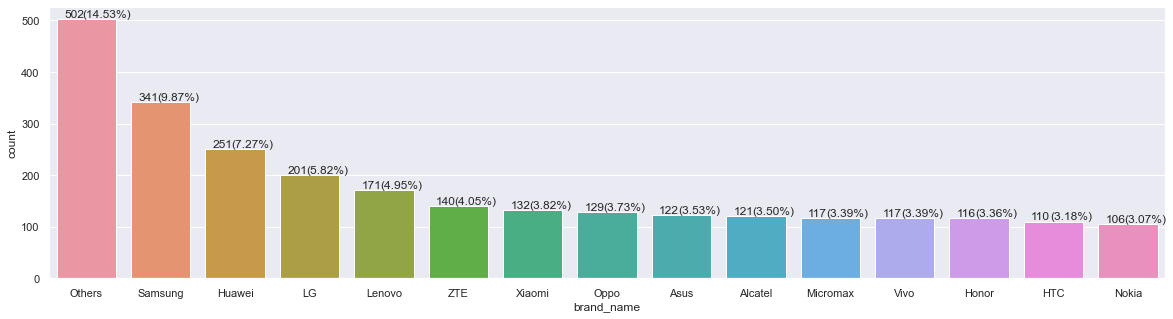

<IPython.core.display.Javascript object>

In [28]:
labelled_countplot(df, "brand_name", showper=True, showcount=True, n=15)

#### Observations
- Brand name is unknown for most of the used devices, marked as Others. 
- Among the known brands, Samsung devices dominates the used device market, followed bu Huawei and LG. 


## Bivariate analysis


#### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

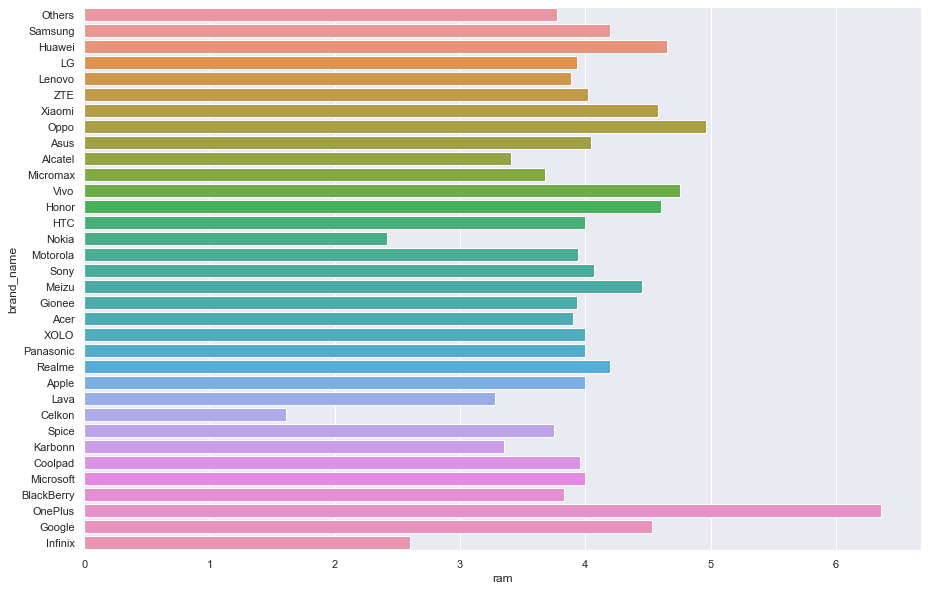

<IPython.core.display.Javascript object>

In [29]:
# seaborn barplot to visualise amount of RAM varying with the brand
plt.figure(figsize=(15, 10))

ax = sns.barplot(
    data=df,
    y="brand_name",
    x="ram",
    order=df["brand_name"].value_counts(ascending=False).index[:],
    ci=None,
)
plt.show()

#### Observations
- Most of the brands have devices with approximately 4 GB RAM.
- OnePlus devices have the maximum RAM of upto 7GB, whereas Celkon devices have the lowest RAM size (less than 2 GB). 
- Some of the brands like Samsung, Huawei, Xiaomi, Vivo , Google have RAM size between 4 and 5 GB. 
- HTC and Nokia also have low RAM size between 2 and 3 GB. 


#### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

<Figure size 1080x360 with 0 Axes>

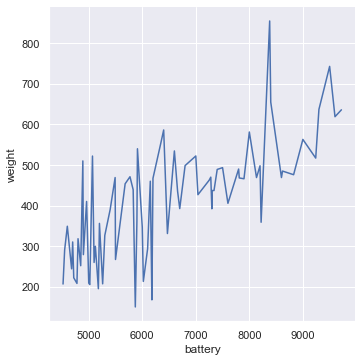

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 5))

# seaborn pointplot to analyse weight of used devices by battery size for batteries over 4500 mAH
ax = sns.relplot(
    data=df[df["battery"] > 4500],
    x="battery",
    y="weight",
    kind="line",
    ci=None,
    sort=True,
)
plt.show()

#### Observations
The graph demonstrates an upward trend that suggests that device weight tends to increase by battery size, although there are few exceptions where devices with large batteries have less weight. 


#### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

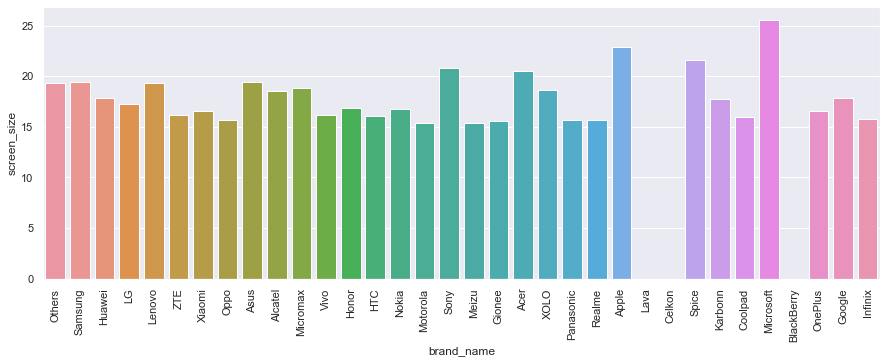

<IPython.core.display.Javascript object>

In [31]:
# seaborn barplot to visualise amount of RAM varying with the brand
plt.figure(figsize=(15, 5))

ax = sns.barplot(
    data=df[df["screen_size"] > 6.0 * 2.54],
    x="brand_name",
    y="screen_size",
    order=df["brand_name"].value_counts(ascending=False).index[:],
    ci=None,
)
plt.xticks(rotation="vertical")
plt.show()

In [32]:
df[df["screen_size"] > 6.0 * 2.54]["brand_name"].value_counts().sum()

1099

<IPython.core.display.Javascript object>

#### Observations
- There are 1099 devices across all brands with screensize greater than 6 inches.



#### A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

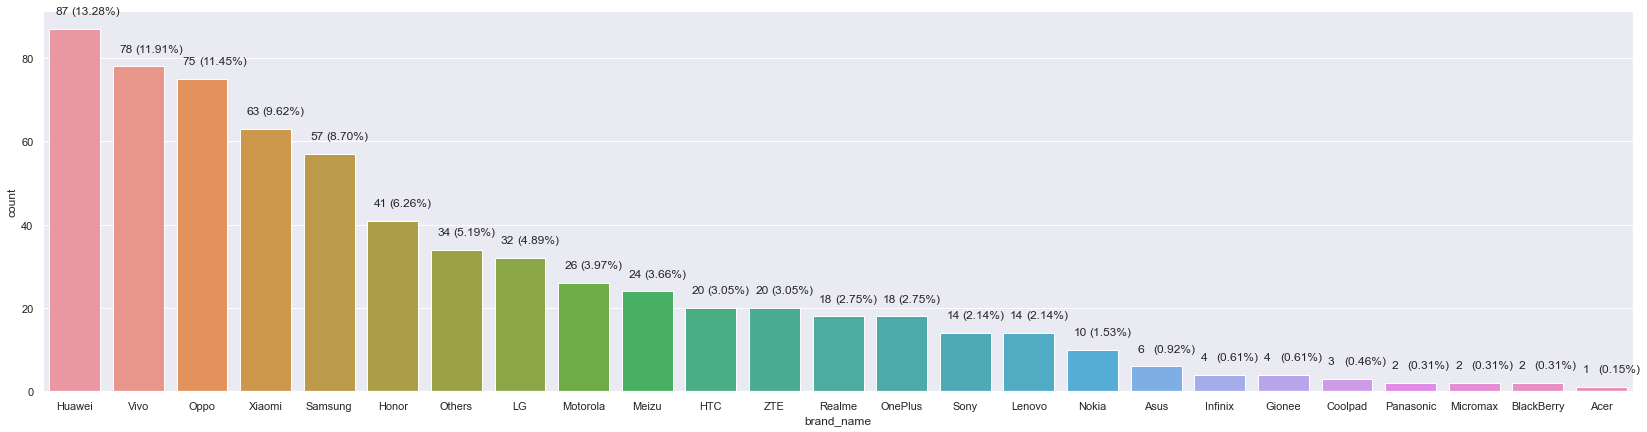

<IPython.core.display.Javascript object>

In [33]:
labelled_countplot(
    df[df["selfie_camera_mp"] > 8], "brand_name", showper=True, showcount=True
)

In [34]:
df[df["selfie_camera_mp"] > 8]["brand_name"].value_counts().sum()

655

<IPython.core.display.Javascript object>

In [35]:
df[df["main_camera_mp"] > 16]["brand_name"].value_counts().sum()

94

<IPython.core.display.Javascript object>

#### Observations
There are 655 devices across all brands with selfie / front camera greater than 8 megapixels, and 94 devices with main / back camera greater than 16 megapixels.



#### Which attributes are highly correlated with the normalized price of a used device?

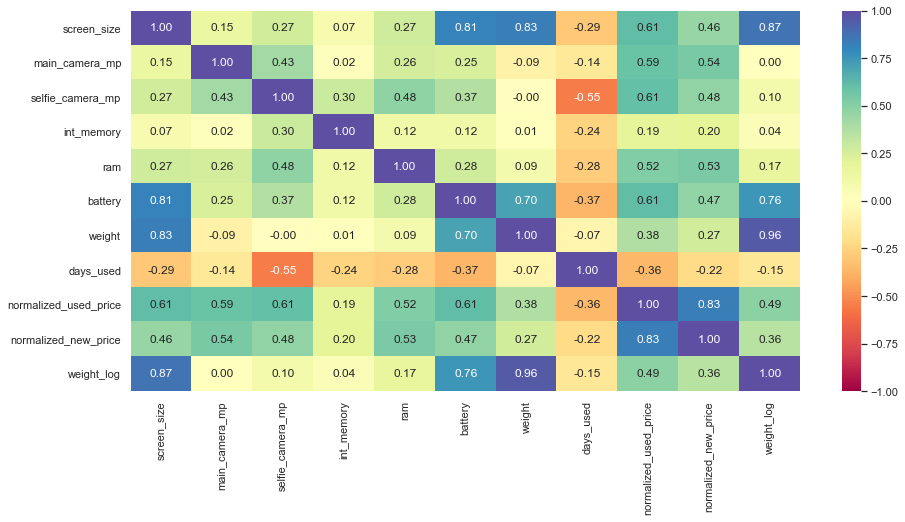

<IPython.core.display.Javascript object>

In [36]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
Above heat map suggests that
- Normalised used price has a high positive correlation with normalised new price, followed by battery, selfie camera and screen size. 
- There is a moderate positive correlation of used price with ram and main camera, and a low correlation with weight and internal memory (very low).
- There is a negative correlation of normalised used price with days used, which indicates that price tends to go down with increased number of days the device has been used. 
- Screen size shows a high positive correlation with battery and weight. 
- Battery shows a high positive correlation with weight.



#### How normalised used price varies by release year

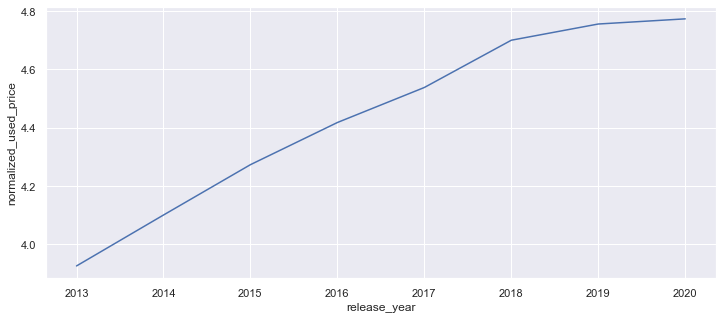

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=None)
plt.show()

#### Observations
The graph shows a linear pattern which suggests that latest models are sold at higher price in the market than the older models.



#### How normalised used price varies by network

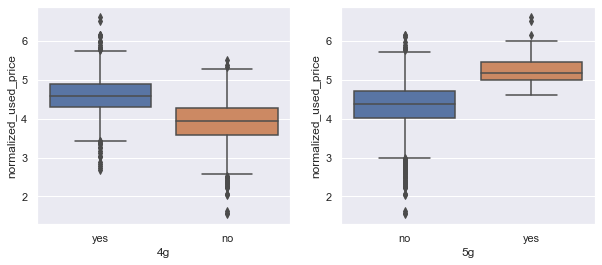

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

#### Observations
- The graph suggests that price tends to be higher for 4g enabled devices, than those that are not. 
- Similar is the trend for 5g enabled devices, i.e. the price goes up if the device supports 5g



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**`Missing Value Treatment`**

In [111]:
# Check missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

<IPython.core.display.Javascript object>

In [112]:
# Creating a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [113]:
# Making a list of all columns with missing values

missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# Substituting missing values with median of the column group by brand_name and release_year

for col in missing_cols:
    df1[col] = df1.groupby(["brand_name", "release_year"])[col].transform(
        lambda x: x.fillna(x.median())
    )

# Checking the missing values after substitution
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

<IPython.core.display.Javascript object>

In [114]:
# There are still missing values in the resultant dataset. Let's fill again by the median but this time group by brand_name only.

missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in missing_cols:
    df1[col] = df1.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )
    
#Checking the missing values after substitution
df1.isnull().sum()


brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
weight_log                7
dtype: int64

<IPython.core.display.Javascript object>

In [115]:
# There are still missing values in main_camera_mp. Let's substitute it with the median valueof the column.

df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Checking the missing values after substitution
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               7
dtype: int64

<IPython.core.display.Javascript object>

In [116]:
# There are 7 missing values in weight_log column. Apply log transformation
df1["weight_log"] = np.log(df1["weight"])

# Checking the missing values after substitution
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

<IPython.core.display.Javascript object>

In [117]:
df1["battery_log"] = np.log(df1["battery"])
df1["int_memory_log"] = np.log(df1["int_memory"])
df1["screen_size_log"] = np.log(df1["screen_size"])
df1["normalized_used_price_log"] = np.log(df1["normalized_used_price"])
df1["normalized_new_price_log"] = np.log(df1["normalized_new_price"])

<IPython.core.display.Javascript object>

In [118]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,battery_log,int_memory_log,screen_size_log,normalized_used_price_log,normalized_new_price_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607,8.013012,4.158883,2.674149,1.460375,1.550770
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,8.366370,4.852030,2.850707,1.641343,1.708200
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,8.342840,4.852030,2.814810,1.631411,1.772344
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,8.888757,4.158883,3.238678,1.636155,1.728280
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,8.517193,4.158883,2.729159,1.479328,1.598951


<IPython.core.display.Javascript object>

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 3454 non-null   object 
 1   os                         3454 non-null   object 
 2   screen_size                3454 non-null   float64
 3   4g                         3454 non-null   object 
 4   5g                         3454 non-null   object 
 5   main_camera_mp             3454 non-null   float64
 6   selfie_camera_mp           3454 non-null   float64
 7   int_memory                 3454 non-null   float64
 8   ram                        3454 non-null   float64
 9   battery                    3454 non-null   float64
 10  weight                     3454 non-null   float64
 11  release_year               3454 non-null   int64  
 12  days_used                  3454 non-null   int64  
 13  normalized_used_price      3454 non-null   float

<IPython.core.display.Javascript object>

In [120]:
# Dropping weight column , now that we've created weight log
df1.drop(
    columns=[
        "weight",
        "battery",
        "int_memory",
        "screen_size",
        "normalized_new_price",
        "normalized_used_price",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 3454 non-null   object 
 1   os                         3454 non-null   object 
 2   4g                         3454 non-null   object 
 3   5g                         3454 non-null   object 
 4   main_camera_mp             3454 non-null   float64
 5   selfie_camera_mp           3454 non-null   float64
 6   ram                        3454 non-null   float64
 7   release_year               3454 non-null   int64  
 8   days_used                  3454 non-null   int64  
 9   weight_log                 3454 non-null   float64
 10  battery_log                3454 non-null   float64
 11  int_memory_log             3454 non-null   float64
 12  screen_size_log            3454 non-null   float64
 13  normalized_used_price_log  3454 non-null   float

<IPython.core.display.Javascript object>

All the missing values have been imputed. There are no more missing values in the data.

In [122]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
weight_log,3454.0,5.135866,0.342228,4.234107,4.955827,5.075174,5.220356,6.751101
battery_log,3454.0,7.969093,0.404420,6.214608,7.649693,8.006368,8.294050,9.181941
int_memory_log,3454.0,3.469224,1.073914,-4.605170,2.772589,3.465736,4.158883,6.931472
screen_size_log,3454.0,2.580292,0.281081,1.625311,2.541602,2.551786,2.730464,3.424588
normalized_used_price_log,3454.0,1.463550,0.145688,0.429746,1.394741,1.482770,1.559344,1.890010


<IPython.core.display.Javascript object>

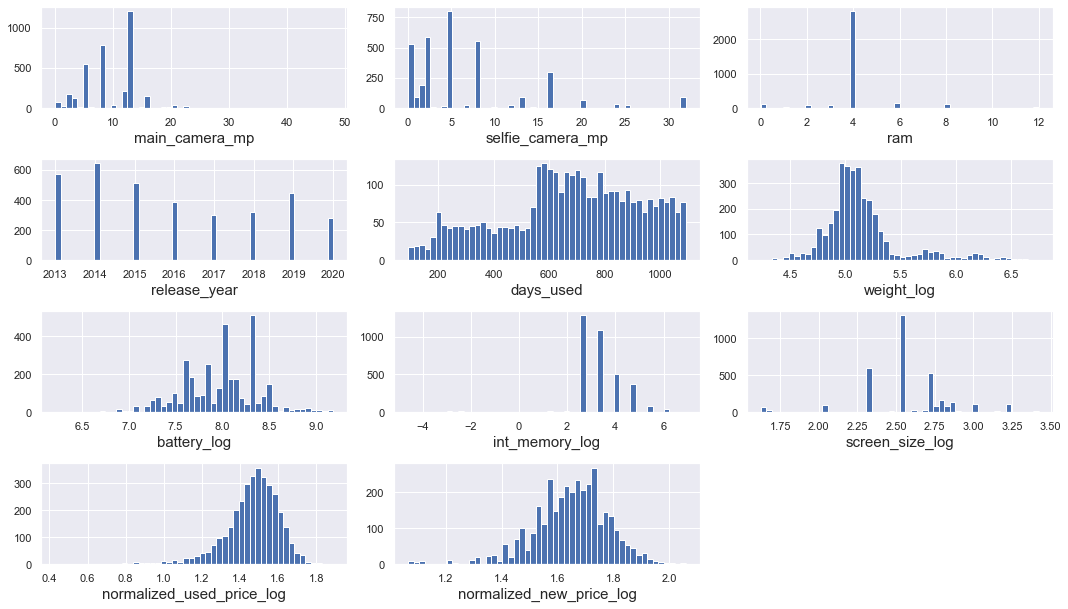

<IPython.core.display.Javascript object>

In [123]:
out_cols = [item for item in df1.select_dtypes(include=np.number).columns]
plt.figure(figsize=(15, 25))

for i in range(len(out_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[out_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(out_cols[i], fontsize=15)

plt.show()

**`Feature Engineering`**

Let's create a new variable `years_since_release` considering 2021 as baseline year for the data, and drop release_year column

In [124]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

**`Outlier Detection`**

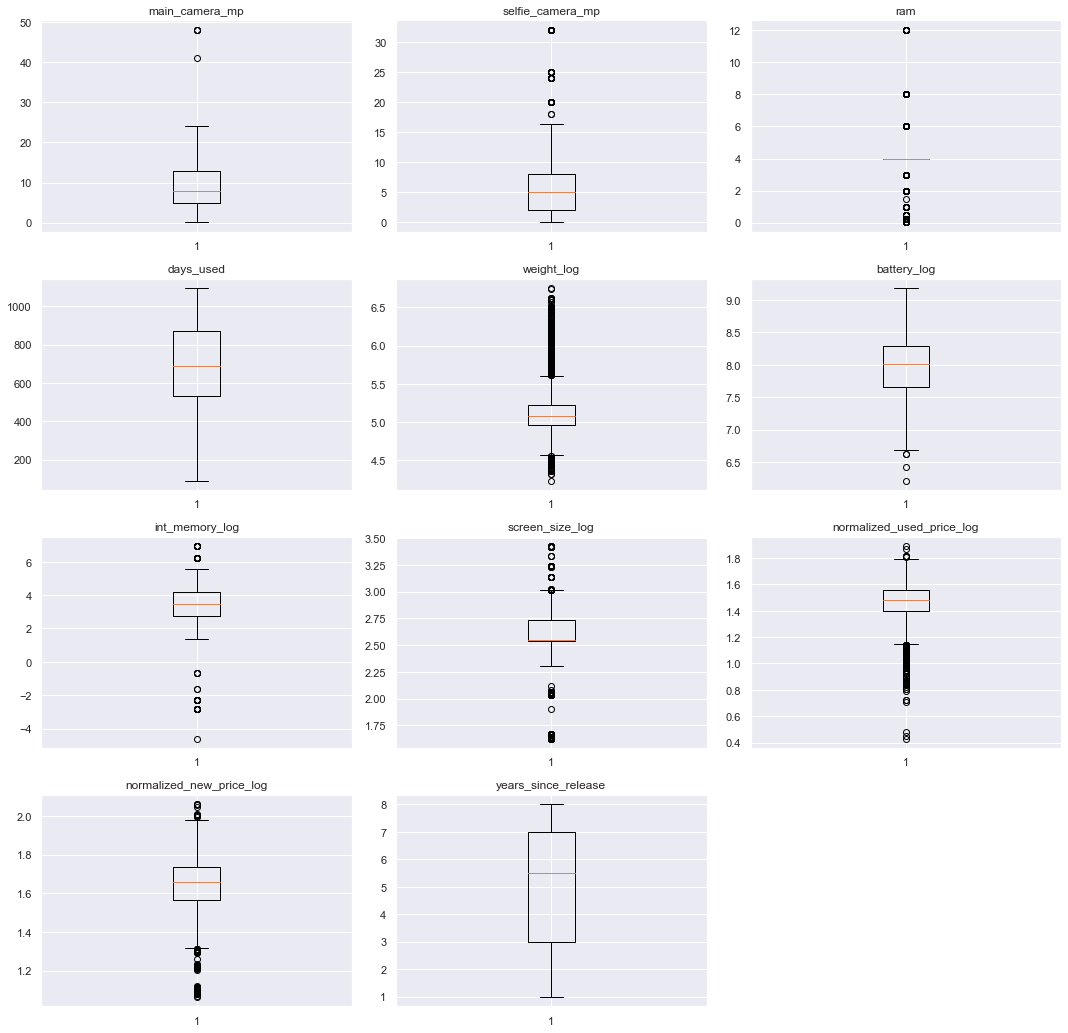

<IPython.core.display.Javascript object>

In [125]:
out_cols = [item for item in df1.select_dtypes(include=np.number).columns]
plt.figure(figsize=(15, 25))

for i, variable in enumerate(out_cols):
    plt.subplot(7, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Most of the columns have outliers in them.
- We will treat these outliers by flooring and capping, i.e., we will replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.
- The boxplot for `ram` shows that the Q1 and Q3 values are same for the column. With outlier treatment, IQR will become 0 making Lower_Whisker = Upper_Whisker, which will then substitute all the values under `ram` column same upon clipping, which will affect VIF for the column in further steps. We don't want that to happen. So we'll treat outliers in all other columns, except `ram`.
- We'll not treat `normalised_used_price` since it's a dependent variable. The variation could be useful. Also, since correlation matrix shows a high correlation of `normalised_used_price` with `normalised_new_price`, we'll leave the outliers in `normalised_new_price` as well.

In [75]:
# stats for ram column
Q1 = df["ram"].quantile(0.25)  # 25th quantile
Q3 = df["ram"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print(f"Q1 - {Q1}")
print(f"Q3 - {Q3}")
print(f"IQR - {IQR}")
print(f"Lower_Whisker - {Lower_Whisker}")
print(f"Upper_Whisker - {Upper_Whisker}")

Q1 - 4.0
Q3 - 4.0
IQR - 0.0
Lower_Whisker - 4.0
Upper_Whisker - 4.0


<IPython.core.display.Javascript object>

In [76]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [127]:
treat_out_cols = [
    "screen_size_log",
    "weight_log",
    "normalized_used_price_log",
    "normalized_new_price_log",
]


df2 = treat_outliers_all(df1, treat_out_cols)

<IPython.core.display.Javascript object>

Check to see if there are anymore outliers

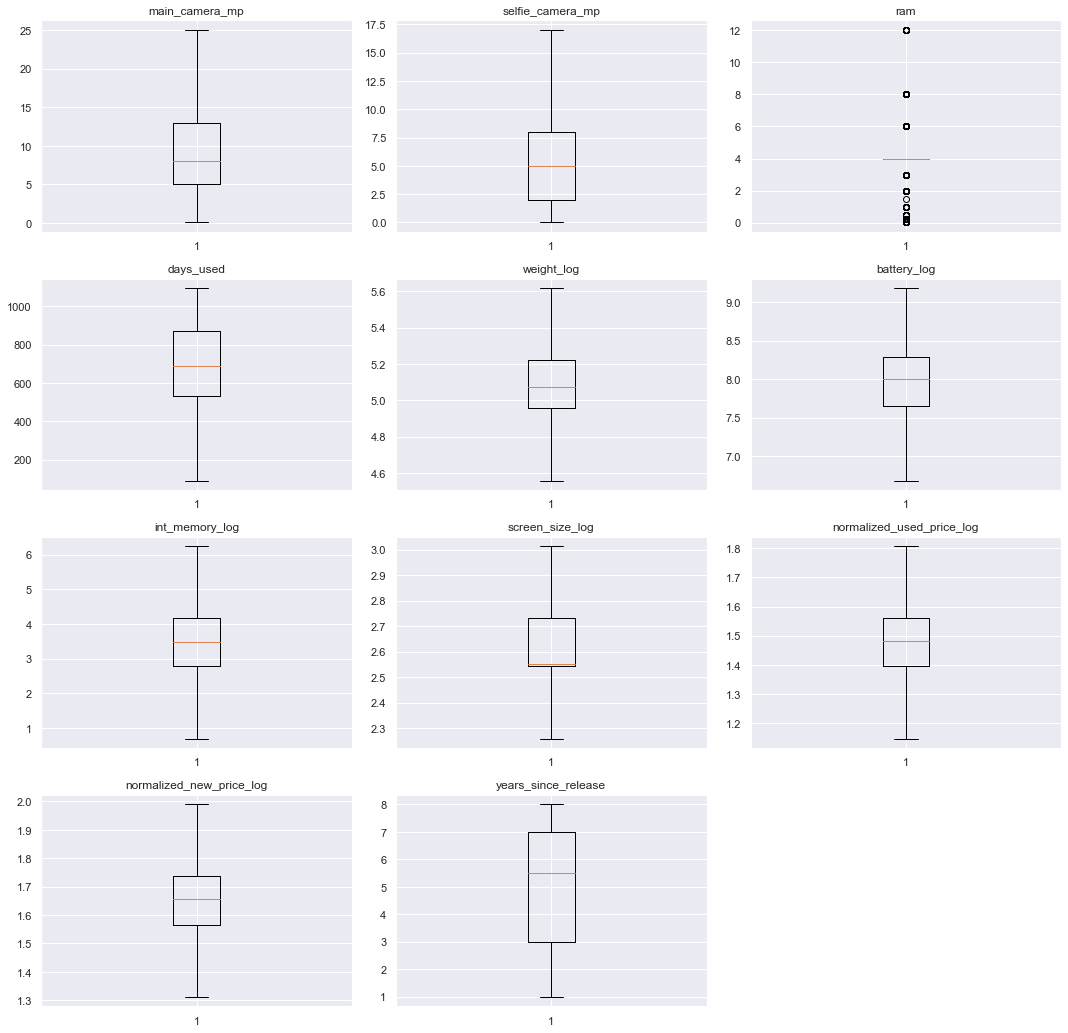

<IPython.core.display.Javascript object>

In [128]:
plt.figure(figsize=(15, 25))

for i, variable in enumerate(out_cols):
    plt.subplot(7, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are no more outliers in the data post treatment, except for `ram`, `normalised_used_price`, `normalised_new_price` which we've left on purpose ( as explained in abive steps)

## EDA

- It is a good idea to explore the data once again after manipulating it.

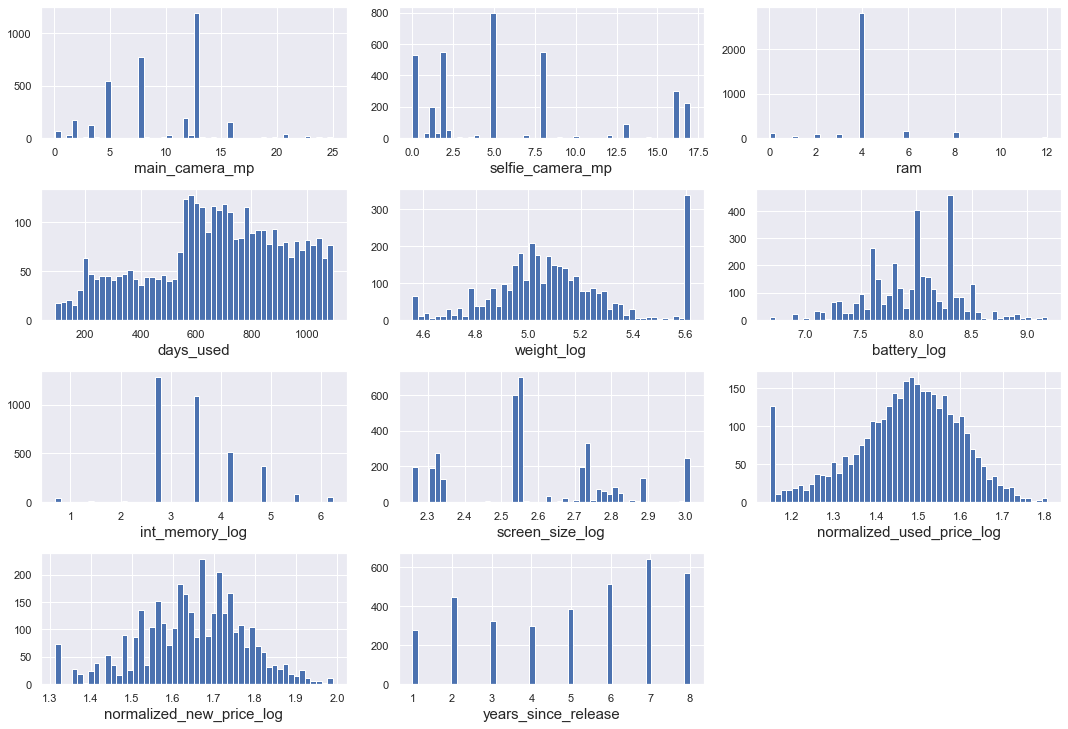

<IPython.core.display.Javascript object>

In [129]:
# Checking the data for skewness
plt.figure(figsize=(15, 30))

for i in range(len(out_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[out_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(out_cols[i], fontsize=15)

plt.show()

Almost all the graphs are skewed apart from weight, normalized_used_price and normalized_new_price

## Building a Linear Regression model

The objective of the linear regression model is to predict the price of a used phone/tablet and identify factors that significantly influence it. 
- Our dependent variable is normalized_used_price.
- We'll divide the data into training and test, to build our model on traning data and evaluate on testing data.

In [130]:
# define dependent variable
X = df2.drop(
    ["normalized_used_price_log", "brand_name"], axis=1
)  # dropping normalized_used_price since it is the dependent variable. Also, brand_name since we have OS
y = df2["normalized_used_price_log"]

<IPython.core.display.Javascript object>

In [131]:
# Add intercept to the data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [132]:
print(X.head())
print()
print(y.head())

   const       os   4g   5g  main_camera_mp  selfie_camera_mp  ram  days_used  \
0    1.0  Android  yes   no            13.0               5.0  3.0        127   
1    1.0  Android  yes  yes            13.0              16.0  8.0        325   
2    1.0  Android  yes  yes            13.0               8.0  8.0        162   
3    1.0  Android  yes  yes            13.0               8.0  6.0        345   
4    1.0  Android  yes   no            13.0               8.0  3.0        293   

   weight_log  battery_log  int_memory_log  screen_size_log  \
0    4.983607     8.013012        4.158883         2.674149   
1    5.361292     8.366370        4.852030         2.850707   
2    5.361292     8.342840        4.852030         2.814810   
3    5.617149     8.888757        4.158883         3.013756   
4    5.220356     8.517193        4.158883         2.729159   

   normalized_new_price_log  years_since_release  
0                  1.550770                    1  
1                  1.708200     

<IPython.core.display.Javascript object>

In [133]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,main_camera_mp,selfie_camera_mp,ram,days_used,weight_log,battery_log,int_memory_log,screen_size_log,normalized_new_price_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,13.0,5.0,3.0,127.0,4.983607,8.013012,4.158883,2.674149,1.550770,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,13.0,16.0,8.0,325.0,5.361292,8.366370,4.852030,2.850707,1.708200,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,13.0,8.0,8.0,162.0,5.361292,8.342840,4.852030,2.814810,1.772344,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,13.0,8.0,6.0,345.0,5.617149,8.888757,4.158883,3.013756,1.728280,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,13.0,8.0,3.0,293.0,5.220356,8.517193,4.158883,2.729159,1.598951,1.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [134]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [135]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [137]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.842
Model:                                   OLS   Adj. R-squared:                  0.841
Method:                        Least Squares   F-statistic:                     853.0
Date:                       Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                               19:43:51   Log-Likelihood:                 3754.1
No. Observations:                       2417   AIC:                            -7476.
Df Residuals:                           2401   BIC:                            -7384.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **0.0456**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `ram` is **0.0190**.


4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Model performance evaluation

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [88]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [138]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051193,0.040311,0.841997,0.840944,2.801903


<IPython.core.display.Javascript object>

In [139]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051923,0.041342,0.845781,0.843362,2.873482


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.842 and 0.843, indicating that the model explains 84% of the total variation in both train and test sets. 

- RMSE values on the train and test sets are comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict the price of used devices within a mean error of 0.18 euros on the test set.

- MAPE of 4.21 on the test data means that we are able to predict within 4.21% of the normalized used prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [144]:
checking_vif(x_train)

,feature,VIF
0,const,890.603861
1,main_camera_mp,2.156481
2,selfie_camera_mp,3.477866
3,ram,2.076923
4,days_used,2.570741
5,weight_log,4.286923
6,battery_log,4.384497
7,int_memory_log,1.786121
8,screen_size_log,4.963448
9,normalized_new_price_log,2.785352


<IPython.core.display.Javascript object>

* `years_since_release` has VIF slightly greater than 5.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [142]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [143]:
col_list = [
    "years_since_release",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.840865,0.051387


<IPython.core.display.Javascript object>

* Dropping `screen_size` would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop `years_since_release` and check the VIF again.

In [146]:
col_to_drop = "years_since_release"
# x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
# x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

x_train2 = x_train
x_test2 = x_test

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,890.603861
1,main_camera_mp,2.156481
2,selfie_camera_mp,3.477866
3,ram,2.076923
4,days_used,2.570741
5,weight_log,4.286923
6,battery_log,4.384497
7,int_memory_log,1.786121
8,screen_size_log,4.963448
9,normalized_new_price_log,2.785352


<IPython.core.display.Javascript object>

* All the VIF values are now less than 5.
- **The above predictors have no multicollinearity and the assumption is satisfied.**
- **Let's check the model summary.**

In [147]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.842
Model:                                   OLS   Adj. R-squared:                  0.841
Method:                        Least Squares   F-statistic:                     853.0
Date:                       Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                               19:46:21   Log-Likelihood:                 3754.1
No. Observations:                       2417   AIC:                            -7476.
Df Residuals:                           2401   BIC:                            -7384.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.841**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **0.0465**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `ram` is **0.0187**.


4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.834, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables
**Dealing with high p-value variables**

- `const`,`battery`, `days_used`, `os_Others`, `os_Windows`, `os_iOS` and `5g_yes` have p-value > 0.05. So, they are not significant and we'll drop them all except `const`.
    - In general, it is preferred not to remove the constant term from the linear regression as it ensures that the residuals are zero mean and the other regression parameters will be biased if it is removed, even if the constant is statistically insignificant..
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [148]:
# initial list of columns
cols = x_train2.columns.tolist()
## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[
        cols
    ]  ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight_log', 'int_memory_log', 'screen_size_log', 'normalized_new_price_log', '4g_yes']


<IPython.core.display.Javascript object>

In [149]:
# x_train3 = x_train2[["const"] + selected_features]
# x_test3 = x_test2[["const"] + selected_features]

x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [150]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.841
Model:                                   OLS   Adj. R-squared:                  0.841
Method:                        Least Squares   F-statistic:                     1595.
Date:                       Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                               19:46:57   Log-Likelihood:                 3748.3
No. Observations:                       2417   AIC:                            -7479.
Df Residuals:                           2408   BIC:                            -7426.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<IPython.core.display.Javascript object>

**Now no feature (other than the constant) has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.841, i.e., our model is able to explain ~84% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod* (where we considered all the variables) was 0.842. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [151]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,1.407931,1.336739,0.071191
1525,1.492544,1.543276,-0.050731
1128,1.462179,1.460636,0.001543
3003,1.454436,1.434299,0.020137
2907,1.494350,1.503027,-0.008677


<IPython.core.display.Javascript object>

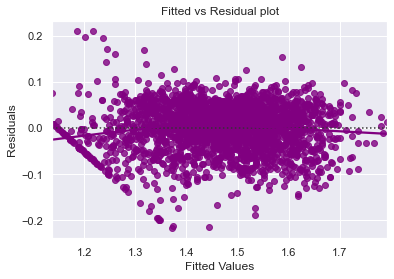

<IPython.core.display.Javascript object>

In [152]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

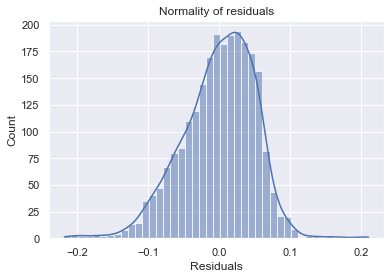

<IPython.core.display.Javascript object>

In [153]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape, although slightly inclined towards right.
- Let's check the Q-Q plot.

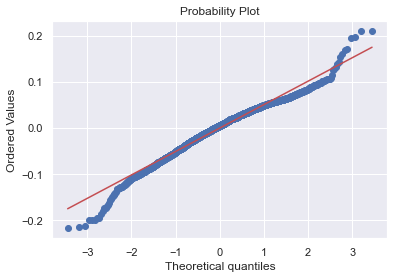

<IPython.core.display.Javascript object>

In [154]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [155]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9787676930427551, pvalue=1.612183389069553e-18)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [156]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.1223546121861985), ('p-value', 0.022862548348738892)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.**

In [108]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.406428
2341,3.696103,3.946964
1913,3.592093,3.736530
688,4.306495,4.159449
650,4.522115,5.106607
2291,4.259294,4.401021
40,4.997685,5.253400
1884,3.875359,4.090055
2538,4.206631,3.970483
45,5.380450,5.347469


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

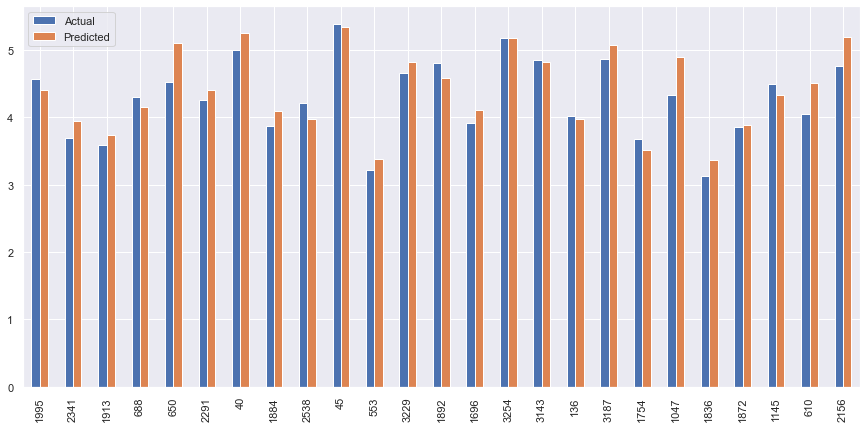

<IPython.core.display.Javascript object>

In [109]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model Summary

In [110]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1597.
Date:                   Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                           19:37:05   Log-Likelihood:                 202.97
No. Observations:                   2417   AIC:                            -387.9
Df Residuals:                       2408   BIC:                            -335.8
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [892]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train3, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233788,0.181886,0.839572,0.838972,4.37122


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [893]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240876,0.186845,0.839133,0.837723,4.557362


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The model is able to explain ~84% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* MAE indicates that our current model is able to predict the price of used devices within a mean error of 0.18 euros on the test set.

* The MAPE on the test set suggests we can predict within 4.2% of the used device price. 

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

- 